In [1]:
from pathlib import Path
from IPython.display import HTML, display
css = Path("../../../css/rtl.css").read_text(encoding="utf-8")
display(HTML(f"<style>{css}</style>"))


# فصل ۴ — مبانی یادگیری نظارت‌شده
## درس ۸: مرور مدل‌های خطی تعمیم‌یافته (GLM) (توابع پیوند، درست‌نمایی)

> **هدف یادگیری:** درک کنید *چرا* GLMها به‌وجود آمدند، چگونه رگرسیون خطی و رگرسیون لجستیک را تعمیم می‌دهند، و اجزای اصلی چگونه کنار هم قرار می‌گیرند: **(۱)** درست‌نمایی از خانواده نمایی، **(۲)** پیش‌بین خطی، **(۳)** تابع پیوند، و **(۴)** برآورد با بیشینه‌سازی درست‌نمایی (اغلب با IRLS / روش‌های نیوتنی).

---

## ۱) چرا به GLM نیاز داریم؟

رگرسیون خطی کلاسیک معمولاً این فرض‌ها را دارد:

- متغیر هدف $y$ *پیوسته* و (تقریباً) گاوسی است.
- نویز هم‌واریانس است: $\mathrm{Var}(y\mid x)=\sigma^2$ ثابت می‌ماند.
- میانگین شرطی خطی است: $\mathbb{E}[y\mid x] = x^\top\beta$.

در عمل، بسیاری از مسائل یادگیری نظارت‌شده این فرض‌ها را نقض می‌کنند:

- **خروجی دودویی** (تقلب/عدم تقلب، دیابتی/غیردیابتی): $y\in\{0,1\}$.
- **شمارش‌ها** (تعداد رخدادها): $y\in\{0,1,2,\dots\}$.
- **هدف‌های پیوسته مثبت** و چولگی‌دار (قیمت، نرخ، مدت‌زمان): $y>0$ با دنباله راست سنگین.
- **نسبت‌ها** یا **نرخ‌ها** با کران‌های طبیعی.

GLM یک چارچوب اصولی و مبتنی بر درست‌نمایی ارائه می‌دهد که:

۱) اجازه می‌دهد برای $y$ یک **توزیع مناسب** انتخاب کنید (از خانواده نمایی).  
۲) میانگین شرطی $\mu(x)=\mathbb{E}[y\mid x]$ را از طریق **پیش‌بین خطی** $\eta(x)=x^\top\beta$ مدل می‌کند.  
۳) $\mu$ و $\eta$ را با **تابع پیوند** $g$ مرتبط می‌کند:  
$$g(\mu) = \eta = x^\top\beta.$$

به همین دلیل است که رگرسیون لجستیک (دودویی) و رگرسیون پواسون (شمارش) به‌طور طبیعی داخل خانواده GLM قرار می‌گیرند.

---

## ۲) قالب GLM: توزیع، بخش سیستماتیک، پیوند

یک مدل خطی تعمیم‌یافته با سه مؤلفه تعریف می‌شود.

### ۲.۱ مؤلفه تصادفی (درست‌نمایی)

فرض کنید توزیع شرطی $y_i\mid x_i$ در **خانواده نمایی** باشد:

$$
p(y\mid \theta, \phi) =
\exp\left(\frac{y\theta - b(\theta)}{a(\phi)} + c(y,\phi)\right),
$$

که در آن:

- $\theta$ **پارامتر طبیعی** است،
- $\phi$ (در صورت وجود) **پارامتر پراکندگی** است،
- $b(\theta)$ رابطه میانگین/واریانس را کنترل می‌کند.

هویت‌های کلیدی (بسیار مهم در GLM):

$$
\mathbb{E}[y\mid x] = b'(\theta), \qquad \mathrm{Var}(y\mid x) = b''(\theta)\,a(\phi).
$$

بنابراین با انتخاب یک توزیع از خانواده نمایی، رابطه میانگین–واریانس به‌صورت ضمنی مشخص می‌شود.

### ۲.۲ مؤلفه سیستماتیک (پیش‌بین خطی)

پیش‌بین خطی را تعریف می‌کنیم:

$$
\eta_i = x_i^\top \beta,
$$

که $x_i$ معمولاً یک ۱ ثابت برای عرض از مبدأ نیز دارد (مگر اینکه عمداً آن را حذف کنید).

### ۲.۳ تابع پیوند

میانگین را به پیش‌بین متصل می‌کنیم:

$$
g(\mu_i)=\eta_i, \qquad \mu_i=\mathbb{E}[y_i\mid x_i].
$$

- اگر $g$ وارون‌پذیر باشد، آنگاه $\mu_i = g^{-1}(x_i^\top\beta)$.
- وقتی $g$ دامنه میانگین را به $\mathbb{R}$ می‌برد، قیود به‌صورت خودکار رعایت می‌شوند:
  - لجستیک: $\mu\in(0,1)$
  - لگاریتم: $\mu>0$

---

## ۳) GLMهای رایج (توزیع + پیوند + تفسیر)

### ۳.۱ گاوسی با پیوند همانی (رگرسیون خطی معمولی)

- توزیع: $y\sim \mathcal{N}(\mu, \sigma^2)$
- پیوند: $g(\mu)=\mu$
- میانگین: $\mu = x^\top\beta$

تفسیر: $\beta_j$ تغییر مورد انتظار در $y$ به ازای یک واحد تغییر در $x_j$ است (با ثابت نگه‌داشتن سایر متغیرها).

### ۳.۲ دوجمله‌ای با پیوند لوجیت (رگرسیون لجستیک)

- توزیع: $y\sim \mathrm{Bernoulli}(p)$ یا $y\sim \mathrm{Binomial}(n,p)$
- میانگین: $\mu=p$
- پیوند: لوجیت  
  $$g(p)=\log\frac{p}{1-p}.$$

در نتیجه:

$$
p = \sigma(\eta)=\frac{1}{1+\exp(-\eta)}.
$$

تفسیر:

- $\eta = x^\top\beta$ همان **لگاریتم شانس** (log-odds) است.
- $\exp(\beta_j)$ یک **نسبت شانس** برای افزایش یک واحدی $x_j$ است.

### ۳.۳ پواسون با پیوند لگاریتم (رگرسیون شمارش)

- توزیع: $y\sim \mathrm{Poisson}(\mu)$
- پیوند: $g(\mu)=\log \mu$
- میانگین: $\mu = \exp(x^\top\beta)$

تفسیر:

- $\beta_j$ یک **لگاریتم نسبت نرخ** است.
- $\exp(\beta_j)$ اثر ضربی روی مقدار مورد انتظار شمارش دارد.

### ۳.۴ گاما با پیوند لگاریتم (پیوسته مثبت)

- توزیع: $y\sim \mathrm{Gamma}(\mu,\phi)$ (پارامترگذاری‌ها متفاوت است)
- پیوند: معمولاً لگاریتم  
  $$\log \mu = x^\top\beta.$$

برای زمانی مفید است که واریانس تقریباً با $\mu^2$ رشد می‌کند و مقادیر قطعاً مثبت هستند.

تفسیر: با پیوند لگاریتم، مانند پواسون، اثرها اغلب ضربی هستند.

---

## ۴) درست‌نمایی، لگ‌درست‌نمایی، و برآورد

GLMها معمولاً با **بیشینه‌سازی درست‌نمایی** برازش می‌شوند.

برای داده‌های $\{(x_i,y_i)\}_{i=1}^n$، لگ‌درست‌نمایی:

$$
\ell(\beta)=\sum_{i=1}^n \log p(y_i\mid \theta_i(\beta),\phi),
$$

که در آن $\theta_i$ از طریق مسیر زیر به $\beta$ وابسته است:

$$
\eta_i=x_i^\top\beta,\quad \mu_i=g^{-1}(\eta_i),\quad \theta_i=\theta(\mu_i).
$$

### ۴.۱ چرا کمترین مربعات کافی نیست؟

برای گاوسی + پیوند همانی، بیشینه‌سازی درست‌نمایی معادل کمینه‌کردن خطای مربعی است.  
اما برای برنولی یا پواسون، خطای مربعی با مدل احتمالاتی هم‌راستا نیست و می‌تواند میانگین‌های نامعتبر تولید کند (شمارش منفی، احتمال خارج از $[0,1]$). درست‌نمایی این مشکل را حل می‌کند.

### ۴.۲ نیوتن / امتیازدهی فیشر و IRLS (دید مفهومی)

یک روش رایج برای بهینه‌سازی $\ell(\beta)$، نیوتن–رافسون است:

$$
\beta^{(t+1)}=\beta^{(t)} - H(\beta^{(t)})^{-1}\nabla \ell(\beta^{(t)}),
$$

که $H$ هسین است. در GLM، روش نزدیک به آن **امتیازدهی فیشر** است که هسین را با امیدریاضی آن جایگزین می‌کند.

این روش‌ها را می‌توان به شکل **کمترین مربعات بازوزن‌دهی تکراری (IRLS)** نوشت:

۱) ساخت «پاسخ کاری» $z$ (یک شبه‌هدف تبدیل‌شده)  
۲) حل یک مسئله کمترین مربعات وزن‌دار با وزن‌های $W$  
۳) به‌روزرسانی $\beta$ و تکرار

شهود: در هر گام، لگ‌درست‌نمایی را محلی با یک تابع درجه دوم تقریب می‌زنید و نتیجه آن یک به‌روزرسانی کمترین مربعات وزن‌دار است.

---

## ۵) دیویانس، AIC و برازش (ارزیابی سبک GLM)

در GLMها، $R^2$ کلاسیک همیشه معنا ندارد. به‌جای آن، تشخیص‌های مبتنی بر درست‌نمایی متداول‌اند:

### ۵.۱ دیویانس

دیویانس مدل برازش‌شده را با مدل اشباع‌شده مقایسه می‌کند:

$$
D = 2\left(\ell_{\text{saturated}} - \ell_{\text{model}}\right).
$$

دیویانس کمتر معمولاً به معنی برازش بهتر است (اگر پیچیدگی قابل مقایسه باشد).

### ۵.۲ AIC

AIC بین برازش و پیچیدگی توازن برقرار می‌کند:

$$
\mathrm{AIC} = 2k - 2\ell(\hat{\beta}),
$$

که $k$ تعداد پارامترهای برآوردشده است. مقدار کمتر بهتر است.

### ۵.۳ کای-دو پیرسون / بیش‌پراکندگی

برای پواسون، مدل می‌گوید $\mathrm{Var}(y\mid x)=\mu$. اگر واریانس مشاهده‌شده خیلی بزرگ‌تر باشد، **بیش‌پراکندگی** رخ می‌دهد و معمولاً با:

$$
\hat{c} = \frac{\chi^2_{\text{Pearson}}}{n-k} \gg 1
$$

تشخیص داده می‌شود.

در این حالت ممکن است به موارد زیر نیاز داشته باشید:
- خطاهای استاندارد مقاوم،
- شبه‌درست‌نمایی،
- نگاتیو بینوم،
- یا افزودن کووارییت‌های مهم / ناهمگنی (فراتر از این درس).

---

## ۶) برنامه عملی این نوت‌بوک

در این نوت‌بوک چند GLM را با چند دیتاست از مخزن شما برازش می‌کنیم:

۱) **دوجمله‌ای/لوجیت (لجستیک)** روی `diabetes.csv`  
۲) **پواسون/لگ** برای شمارش‌ها با `NYC_Collisions.csv` (با ساخت هدف شمارشی)  
۳) **گاما/لگ** روی `European_Ski_Resorts.csv` برای یک خروجی مثبت و چولگی‌دار

در مسیر:
- مهندسی ویژگی،
- برخورد با متغیرهای کیفی،
- مقایسه GLM با مدل‌های `sklearn`،
- تفسیر ضرایب روی مقیاس طبیعی،
- محاسبه معیارهای مبتنی بر درست‌نمایی (دیویانس، AIC)،
- و چند تشخیص پایه

را انجام می‌دهیم.

---

## ۷) قبل از اجرا: محیط و کتابخانه‌ها

ما عمدتاً از این‌ها استفاده می‌کنیم:
- `pandas`, `numpy` برای آماده‌سازی داده،
- `matplotlib` برای نمودار،
- `scikit-learn` برای تقسیم آموزش/آزمون و معیارها،
- `statsmodels` برای برازش GLM و استنباط (خطای استاندارد، آزمون‌ها، AIC).

اگر `statsmodels` نصب نیست، در محیط خود نصب کنید:
- `pip install statsmodels`

---

## ۸) تمرین‌ها (نمای کلی)

پس از هر بخش اصلی، تمرین‌هایی خواهید دید که عمداً عملی هستند:

- انتخاب تابع پیوند و توجیه آن برای توزیع هدف
- برازش چند GLM و مقایسه AIC/دیویانس
- تشخیص بدبرازش (مثلاً بیش‌پراکندگی در شمارش‌ها)
- تفسیر ضرایب روی مقیاس درست (نسبت شانس، نسبت نرخ)
- ساخت یک جریان ساده انتخاب مدل با اعتبارسنجی

---


## ۹) نظریه عمیق‌تر: خانواده نمایی، پیوند کاننیکال، و تابع واریانس

این بخش از نظر ریاضی سنگین‌تر از بقیه درس است. هدف حفظ‌کردن نیست؛ هدف ساختن شهود درباره این است که *چرا* GLMها پیوندهای «استاندارد» مشخصی دارند و چرا IRLS کار می‌کند.

### ۹.۱ مرور خانواده نمایی

یک توزیع در خانواده نمایی است اگر بتوان آن را این‌گونه نوشت:

$$
p(y\mid \theta,\phi)=\exp\left(\frac{y\theta-b(\theta)}{a(\phi)} + c(y,\phi)\right).
$$

نتیجه‌های مهم:

۱) لگ‌درست‌نمایی برای یک مشاهده:

$$
\log p(y\mid \theta,\phi)=\frac{y\theta-b(\theta)}{a(\phi)} + c(y,\phi).
$$

۲) میانگین و واریانس:

$$
\mu = \mathbb{E}[y] = b'(\theta), \qquad \mathrm{Var}(y)=b''(\theta)\,a(\phi).
$$

چون برای بسیاری از خانواده‌ها $b'(\theta)$ یکنواخت است، می‌توان آن را وارون کرد تا $\theta$ بر حسب $\mu$ نوشته شود:
$$
\theta = (b')^{-1}(\mu).
$$

این مسیر، ارتباطی نرم و طبیعی بین میانگین $\mu$ و پارامتر طبیعی $\theta$ فراهم می‌کند.

### ۹.۲ پیوند کاننیکال

یک **پیوند کاننیکال** این انتخاب را انجام می‌دهد:
$$
\eta = \theta.
$$

از آنجا که $\eta=x^\top\beta$ است، پیوند کاننیکال ریاضیات را تمیزتر می‌کند.

پیوندهای کاننیکال رایج:

- برنولی/دوجمله‌ای: کاننیکال **لوجیت** است.
- پواسون: کاننیکال **لگاریتم** است.
- گاوسی: کاننیکال **همانی** است.
- گاما: کاننیکال **معکوس** است (هرچند در عمل پیوند لگاریتم به‌دلیل تفسیرپذیری زیاد استفاده می‌شود).

پیوندهای کاننیکال معمولاً پایداری عددی بهتری دارند و آمارهای کافی راحت‌تری ایجاد می‌کنند.

### ۹.۳ تابع واریانس

در بسیاری از ارائه‌ها، واریانس GLM به‌شکل زیر نوشته می‌شود:
$$
\mathrm{Var}(y\mid x)=\phi\,V(\mu),
$$
که $V(\mu)$ همان **تابع واریانس** است و توسط خانواده توزیع تعیین می‌شود.

مثال‌ها:

- گاوسی: $V(\mu)=1$
- دوجمله‌ای: $V(\mu)=\mu(1-\mu)$
- پواسون: $V(\mu)=\mu$
- گاما: $V(\mu)=\mu^2$

این موضوع عملی است، چون وزن‌های IRLS را کنترل می‌کند: مشاهده‌هایی که واریانس مدل‌شده بزرگ‌تری دارند وزن کوچک‌تری می‌گیرند.

---

## ۱۰) IRLS با جزئیات کمی بیشتر (اما همچنان عملی)

حتی اگر خودتان IRLS را پیاده‌سازی نکنید، دانستن آن کمک می‌کند رفتار برازش را بفهمید:

- چرا بعضی نقاط «کم‌وزن» می‌شوند
- چرا جداسازی (separation) لجستیک را خراب می‌کند
- چرا مقیاس‌بندی مفید است
- چرا گاهی همگرایی با شروع‌های بد شکست می‌خورد

در IRLS برای GLM، در $\beta$ فعلی این کمیت‌ها ساخته می‌شود:

۱) پیش‌بین خطی:
$$
\eta_i = x_i^\top\beta
$$

۲) میانگین:
$$
\mu_i = g^{-1}(\eta_i)
$$

۳) پاسخ کاری:
$$
z_i = \eta_i + (y_i-\mu_i)\left(\frac{d\eta_i}{d\mu_i}\right)
$$

۴) وزن‌ها:
$$
w_i = \left(\frac{d\mu_i}{d\eta_i}\right)^2 \Big/ \mathrm{Var}(y_i\mid x_i)
= \left(\frac{d\mu_i}{d\eta_i}\right)^2 \Big/ \left(\phi\,V(\mu_i)\right)
$$

سپس حل می‌کنیم:
$$
\beta^{\text{new}} = \arg\min_\beta \sum_i w_i\,(z_i - x_i^\top\beta)^2.
$$

این دقیقاً یک **کمترین مربعات وزن‌دار** است.

### نتیجه عملی

- اگر $\mathrm{Var}(y\mid x)$ بزرگ باشد، وزن کوچک می‌شود: آن مشاهده نفوذ کمتری دارد.
- در رگرسیون لجستیک، وقتی احتمال‌های پیش‌بینی‌شده خیلی نزدیک ۰ یا ۱ شوند، مشتق‌ها می‌توانند خیلی کوچک شوند و اگر داده نزدیک به جداسازی باشد، مسائل عددی ایجاد می‌شود.

---

## ۱۱) استنباط در GLMها: چه چیزهایی «رایگان» می‌گیرید (و چه چیزهایی نه)

از آنجا که GLMها مبتنی بر درست‌نمایی هستند، ابزارهای استنباطی متعددی دارید:

### ۱۱.۱ خطای استاندارد و آزمون والد (Wald)

پس از برازش، یک ماتریس کوواریانس برای $\hat{\beta}$ دارید. آزمون z والد معمولاً:

$$
z_j = \frac{\hat{\beta}_j}{\mathrm{SE}(\hat{\beta}_j)}.
$$

**احتیاط:** در نمونه‌های کوچک یا مسائل نزدیک به حالت‌های بدشرط (کلاس‌های نادر، جداسازی)، آزمون والد ممکن است قابل اتکا نباشد.

### ۱۱.۲ آزمون نسبت درست‌نمایی (مدل‌های تو در تو)

برای مدل‌های تو در تو (یکی نسخه محدود دیگری است)، می‌توانید لگ‌درست‌نمایی‌ها را مقایسه کنید:

$$
\Lambda = 2(\ell_{\text{full}} - \ell_{\text{restricted}}).
$$

تحت شرایط منظم، $\Lambda$ تقریباً توزیع $\chi^2$ با درجه آزادی برابر با تعداد پارامترهای اضافه دارد.

### ۱۱.۳ بازه اطمینان روی مقیاس طبیعی

چون ضرایب معمولاً در واحدهای لگ‌اُدز یا لگ‌نرخ هستند، اغلب آن‌ها را نمایی می‌کنید:

- لجستیک: $\exp(\beta_j)$ نسبت شانس است.
- پواسون: $\exp(\beta_j)$ نسبت نرخ است.

بنابراین بازه ۹۵٪ برای $\exp(\beta_j)$:

$$
\left[\exp(\hat{\beta}_j - 1.96\,\mathrm{SE}_j),\ \exp(\hat{\beta}_j + 1.96\,\mathrm{SE}_j)\right].
$$

---

## ۱۲) الگوهای کاربردی مهم در GLM

### ۱۲.۱ افست‌ها (میزان مواجهه / Exposure)

گاهی مقدار مورد انتظار با میزان مواجهه شناخته‌شده $E_i$ مقیاس می‌شود (زمان در معرض، اندازه جمعیت، تعداد آزمون‌ها). از **افست** استفاده کنید:

$$
\log(\mu_i) = x_i^\top\beta + \log(E_i)
$$

در `statsmodels`، افست را با `offset=np.log(E)` می‌دهید.

تفسیر: مدل، **نرخ** را به ازای هر واحد مواجهه توضیح می‌دهد.

### ۱۲.۲ متغیرهای کیفی

متغیرهای کیفی معمولاً با کدگذاری دامی/وان‌هات وارد پیش‌بین خطی می‌شوند. در فرمول‌ها اغلب `C(category)` می‌نویسید.

احتیاط:
- دسته‌های خیلی کم‌نمونه تخمین‌های ناپایدار ایجاد می‌کنند.
- ضرایب نسبت به یک دسته پایه تفسیر می‌شوند.

### ۱۲.۳ منظم‌سازی

MLE در GLM با ویژگی‌های زیاد ممکن است بیش‌برازش کند. GLMهای جریمه‌دار اضافه می‌کنند:

$$
\ell(\beta) - \lambda\|\beta\|_2^2
$$

(جریمه L2 / ریج) یا L1 / لاسو.

در عمل:
- رگرسیون لجستیک در scikit-learn به‌طور پیش‌فرض جریمه‌دار است.
- در statsmodels می‌توانید از `fit_regularized` استفاده کنید.

### ۱۲.۴ جداسازی در رگرسیون لجستیک

اگر ترکیب خطی ویژگی‌ها کلاس‌ها را کامل جدا کند، MLE وجود ندارد (ضرایب به بی‌نهایت می‌روند). علائم:
- ضرایب با قدر مطلق بسیار بزرگ
- هشدارهای همگرایی
- احتمال‌های پیش‌بینی‌شده دقیقاً ۰ یا ۱ روی آموزش

راهکارها:
- منظم‌سازی
- کاهش ویژگی
- داده بیشتر
- روش‌هایی مانند تصحیح فیرث (در این درس پوشش داده نمی‌شود)

### ۱۲.۵ بیش‌پراکندگی در پواسون

وقتی $\mathrm{Var}(y\mid x)\gg \mathbb{E}[y\mid x)$، خطاهای استاندارد پواسون می‌تواند بیش از حد خوش‌بینانه باشد. گزینه‌ها:
- خطاهای استاندارد مقاوم (sandwich)
- نگاتیو بینوم
- افزودن کووارییت‌های جاافتاده / مدل‌کردن ناهمگنی

---

## ۱۳) تمرین‌ها (نظری + تفسیر)

۱) **انتخاب پیوند:** دو مثال بزنید که پیوند همانی نامعتبر است. توضیح دهید چرا پیوندهای لوجیت و لگ مشکل را حل می‌کنند.  
۲) **شهود پیوند کاننیکال:** برای پواسون، به‌صورت مفهومی توضیح دهید چرا پیوند لگاریتم طبیعی است وقتی پارامتر طبیعی به $\log\mu$ مربوط می‌شود.  
۳) **نسبت شانس:** اگر $\hat{\beta}_{\text{BMI}}=0.08$ در یک GLM لجستیک باشد، $\exp(0.08)$ را تفسیر کنید.  
۴) **افست:** تعداد تصادف‌ها در هر قطعه جاده را مدل می‌کنید اما طول قطعه‌ها متفاوت است. توضیح دهید چگونه طول را به‌عنوان مواجهه وارد می‌کنید.  
۵) **بیش‌پراکندگی:** اگر نسبت کای-دو پیرسون به درجه آزادی ۳.۲ باشد، دو علت محتمل و دو درمان را فهرست کنید.

---


## ۱۶) GLMها و «تابع زیان»: پیوند آمار با نگاه ML

در یادگیری ماشین، معمولاً به یک **زیان** فکر می‌کنید که باید کمینه شود. در مدل‌های مبتنی بر درست‌نمایی:

$$
\text{Loss}(\beta) = -\ell(\beta)
$$

(تا یک ثابت). به همین دلیل بسیاری از اهداف آموزشی GLM در ML به‌صورت زیان‌های استاندارد ظاهر می‌شوند.

### ۱۶.۱ رگرسیون لجستیک = زیان آنتروپی متقاطع

برای خروجی‌های برنولی $y_i\in\{0,1\}$ و $p_i=\sigma(x_i^\top\beta)$، لگ‌درست‌نمایی:

$$
\ell(\beta)=\sum_i \left[y_i\log p_i + (1-y_i)\log(1-p_i)\right].
$$

منفی آن دقیقاً همان **binary cross-entropy** است.

#### شهود گرادیان

اگر $X$ ماتریس ویژگی‌ها و $p$ بردار احتمال‌های پیش‌بینی‌شده باشد:

$$
\nabla_\beta (-\ell(\beta)) = X^\top(p-y).
$$

پس آموزش، پیش‌بینی‌ها را به برچسب‌ها نزدیک می‌کند.

### ۱۶.۲ رگرسیون پواسون = لگ‌درست‌نمایی شمارش

برای $y_i\sim\text{Poisson}(\mu_i)$ با $\mu_i=\exp(x_i^\top\beta)$:

$$
\ell(\beta)=\sum_i \left[y_i\log\mu_i - \mu_i - \log(y_i!)\right]
=\sum_i \left[y_i x_i^\top\beta - \exp(x_i^\top\beta) - \log(y_i!)\right].
$$

ترم آخر نسبت به $\beta$ ثابت است، بنابراین بهینه‌سازی روی:

$$
\sum_i \left[y_i x_i^\top\beta - \exp(x_i^\top\beta)\right]
$$

متمرکز می‌شود.

### ۱۶.۳ منظم‌سازی به‌عنوان پیشین / جریمه

وقتی در ML منظم‌سازی L2 اضافه می‌کنید:

$$
\min_\beta \; -\ell(\beta) + \lambda \|\beta\|_2^2
$$

می‌توانید دو تفسیر داشته باشید:

- **دید بهینه‌سازی:** از ضرایب خیلی بزرگ جلوگیری می‌کند و تعمیم را بهتر می‌کند.
- **دید بیزی:** به‌طور مفهومی معادل یک پیشین گاوسی روی $\beta$ است.

### ۱۶.۴ چه زمانی GLM کافی است و چه زمانی نه؟

GLMها برای داده‌های جدولی (tabular) اغلب خط پایه بسیار خوبی هستند چون:

- تفسیرپذیرند،
- سریع آموزش می‌بینند،
- با داده متوسط پایدارند،
- و معمولاً احتمال‌ها را خوب کالیبره می‌کنند.

اما GLM ممکن است بدتخصیص (misspecified) باشد وقتی:

- اثرها بسیار غیرخطی هستند،
- برهم‌کنش‌ها پیچیده‌اند،
- ساختار میانگین درست نزدیک به جمع‌پذیری خطی در ویژگی‌ها نیست.

در این حالت می‌توانید:
- گسترش پایه (splines، چندجمله‌ای‌ها)،
- مدل‌های درختی/انسامبل،
- یا GAMها

را امتحان کنید.

نکته کلیدی: **همیشه پیش از رفتن به مدل‌های پیچیده، یک خط پایه GLM خوب تنظیم‌شده بسازید.**

---

## ۱۷) تمرین‌ها (زیان + دید بهینه‌سازی)

۱) منفی لگ‌درست‌نمایی رگرسیون لجستیک را استخراج کنید و آن را به‌عنوان cross-entropy شناسایی کنید.  
۲) برای پواسون با پیوند کاننیکال، به‌صورت مفهومی نشان دهید لگ‌درست‌نمایی نسبت به $\beta$ مقعر است.  
۳) رگرسیون لجستیک را با و بدون جریمه L2 روی `diabetes.csv` برازش کنید. اندازه ضرایب و ROC AUC آزمون را مقایسه کنید.  
۴) در بخش پواسون، همان مدل را با `statsmodels` و سپس با یک مدل GLMمانند در scikit-learn (راهنما: `PoissonRegressor`) برازش کنید. پیش‌بینی‌ها و ضرایب را مقایسه کنید.

---


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression, PoissonRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf

np.random.seed(42)

def safe_read_csv(path: str) -> pd.DataFrame:
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(
            f"Could not find file: {p}\n"
            "Check that you are running this notebook inside the repository and that the relative path is correct."
        )
    return pd.read_csv(p)

def print_metrics_classification(y_true, y_proba, threshold=0.5):
    y_pred = (y_proba >= threshold).astype(int)
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_true, y_proba),
        "threshold": threshold
    }

def plot_roc(y_true, y_proba, title="ROC curve"):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()


# بخش A — GLM دوجمله‌ای (رگرسیون لجستیک) روی `diabetes.csv`

در این بخش از دیتاست طبقه‌بندی `diabetes.csv` استفاده می‌کنیم.

**هدف:** ستون `classification` با مقادیر `Diabetic` و `Non-Diabetic`.

کارهایی که انجام می‌دهیم:

۱) بارگذاری دیتاست از مسیر مخزن  
۲) پاک‌سازی حداقلی (برخورد با کدگذاری‌های ساده‌ی داده‌ی گمشده)  
۳) برازش:
   - یک رگرسیون لجستیک **جریمه‌دار** (scikit-learn)
   - یک GLM دوجمله‌ای **بدون جریمه** با پیوند لوجیت (statsmodels)
۴) ارزیابی روی مجموعه آزمون با:
   - accuracy، precision/recall
   - ROC AUC
   - نمودار کالیبراسیون (اختیاری)
   - تفسیر با نسبت شانس (odds ratio)

## A.1 چرا لجستیک یک GLM است؟

برای هر نمونه $i$، $y_i\in\{0,1\}$ و $p_i=\Pr(y_i=1\mid x_i)$ را تعریف کنید.

- درست‌نمایی: $y_i\sim \mathrm{Bernoulli}(p_i)$
- میانگین: $\mu_i=p_i$
- پیوند: لوجیت

$$
\log\frac{p_i}{1-p_i} = x_i^\top\beta.
$$

پس مدل یک احتمال پیش‌بینی می‌کند و تضمین می‌کند $p_i\in(0,1)$.

## A.2 تفسیر درست ضرایب

یک اشتباه رایج این است که $\beta_j$ را «احتمال به اندازه $\beta_j$ تغییر می‌کند» تفسیر کنیم. در پیوند لوجیت این درست نیست.

در عوض:

- $\beta_j$ تغییر در **لگ‌اُدز** به ازای افزایش یک واحدی $x_j$ است.
- $\exp(\beta_j)$ **نسبت شانس** است.

مثال:

- اگر $\beta_{\text{Glucose}}=0.03$ باشد، هر +۱ واحد گلوکز شانس را در $\exp(0.03)\approx 1.03$ ضرب می‌کند (حدود +۳٪ شانس)، با ثابت نگه‌داشتن سایر متغیرها.

در عمل بهتر است تغییرات را روی واحدهای معنادار (مثلاً +۱۰ واحد گلوکز) تفسیر کنید.

## A.3 نکات عملی (برای این دیتاست)

- برخی ویژگی‌ها صفر دارند که احتمالاً به معنی «گمشده» هستند (مثلاً Insulin، SkinThickness). یک رویکرد ساده نشان می‌دهیم:
  - صفرها را برای چند ستون مشخص، گمشده در نظر می‌گیریم،
  - سپس روی بخش آموزش با میانه (median) جایگزین می‌کنیم.
- همیشه قبل از برازش imputer/scaler تقسیم آموزش/آزمون را انجام دهید تا نشت داده رخ ندهد.

## A.4 تمرین‌ها (لجستیک)

۱) یک GLM لجستیک فقط با `Glucose` و `BMI` بسازید. AIC را با مدل کامل مقایسه کنید.  
۲) برای همه ضرایب نسبت شانس و بازه ۹۵٪ بسازید. کدام ویژگی‌ها شواهد قوی‌تری دارند؟  
۳) یک ویژگی برهم‌کنش `Glucose * BMI` اضافه کنید. آیا AIC بهتر می‌شود؟  
۴) آستانه طبقه‌بندی را از ۰.۵ به ۰.۳۵ تغییر دهید. precision و recall چگونه تغییر می‌کنند؟

---


In [3]:
# Load diabetes dataset (classification)
diabetes_path = "../../../Datasets/Classification/diabetes.csv"
df_diab = safe_read_csv(diabetes_path)

df_diab.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,classification
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


In [4]:
# Basic cleaning: convert target to 0/1
df_diab = df_diab.copy()

target_col = "classification"
df_diab[target_col] = df_diab[target_col].map({"Non-Diabetic": 0, "Diabetic": 1})

# Treat selected zeros as missing (common in this dataset)
zero_as_missing_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in zero_as_missing_cols:
    if col in df_diab.columns:
        df_diab.loc[df_diab[col] == 0, col] = np.nan

X = df_diab.drop(columns=[target_col])
y = df_diab[target_col].astype(int)

num_cols = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
    ],
    remainder="drop"
)

logreg = LogisticRegression(max_iter=2000, solver="liblinear")  # L2-regularized by default

clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", logreg)
])

clf.fit(X_train, y_train)

proba_test = clf.predict_proba(X_test)[:, 1]
metrics_05 = print_metrics_classification(y_test, proba_test, threshold=0.5)
metrics_035 = print_metrics_classification(y_test, proba_test, threshold=0.35)

metrics_05, metrics_035


({'accuracy': 0.7291666666666666,
  'precision': np.float64(0.6363636363636364),
  'recall': np.float64(0.5223880597014925),
  'f1': np.float64(0.5737704918032787),
  'roc_auc': np.float64(0.8238805970149253),
  'threshold': 0.5},
 {'accuracy': 0.7395833333333334,
  'precision': np.float64(0.6103896103896104),
  'recall': np.float64(0.7014925373134329),
  'f1': np.float64(0.6527777777777778),
  'roc_auc': np.float64(0.8238805970149253),
  'threshold': 0.35})

In [5]:
# Inspect sklearn logistic regression coefficients (on standardized feature scale)
feature_names = num_cols
coefs = clf.named_steps["model"].coef_.ravel()

coef_df = pd.DataFrame({"feature": feature_names, "coef": coefs})
coef_df["abs_coef"] = coef_df["coef"].abs()
coef_df.sort_values("abs_coef", ascending=False).head(10)


,feature,coef,abs_coef
1,Glucose,1.159379,1.159379
5,BMI,0.722193,0.722193
0,Pregnancies,0.439298,0.439298
6,DiabetesPedigreeFunction,0.211938,0.211938
7,Age,0.125465,0.125465
3,SkinThickness,-0.058775,0.058775
2,BloodPressure,-0.057243,0.057243
4,Insulin,-0.030674,0.030674


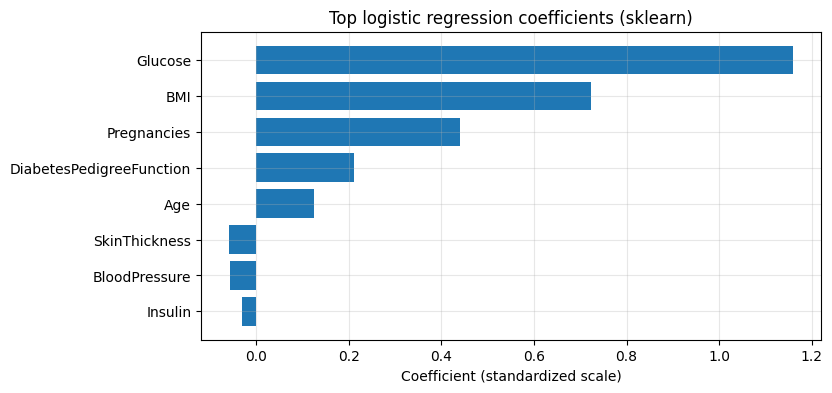

In [6]:
top = coef_df.sort_values("abs_coef", ascending=False).head(10)

plt.figure(figsize=(8, 4))
plt.barh(top["feature"][::-1], top["coef"][::-1])
plt.xlabel("Coefficient (standardized scale)")
plt.title("Top logistic regression coefficients (sklearn)")
plt.grid(True, alpha=0.3)
plt.show()


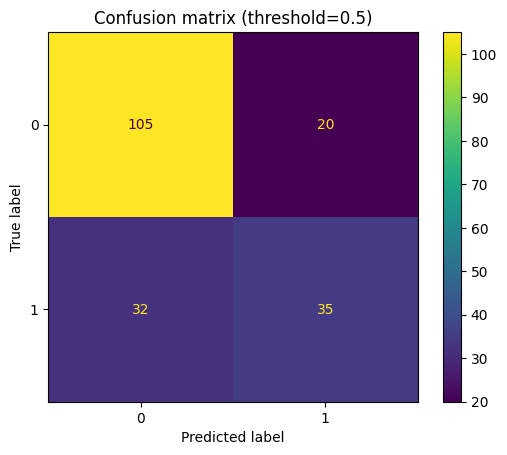

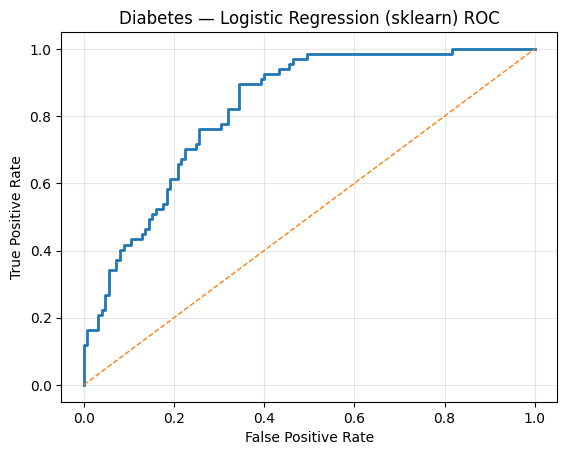

In [7]:
# Confusion matrix at threshold 0.5
y_pred_05 = (proba_test >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_05)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion matrix (threshold=0.5)")
plt.show()

# ROC
plot_roc(y_test, proba_test, title="Diabetes — Logistic Regression (sklearn) ROC")


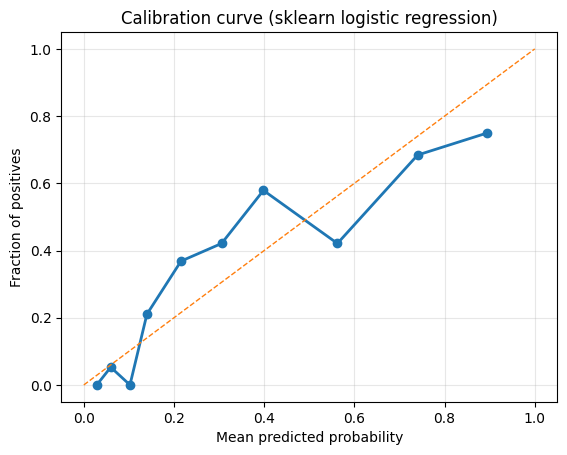

In [8]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, proba_test, n_bins=10, strategy="quantile")

plt.figure()
plt.plot(prob_pred, prob_true, marker="o", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration curve (sklearn logistic regression)")
plt.grid(True, alpha=0.3)
plt.show()


In [9]:
# Statsmodels GLM (Binomial with logit link)
X_train_sm = X_train.copy()
X_test_sm = X_test.copy()

# Median imputation using training medians
train_medians = X_train_sm.median(numeric_only=True)
X_train_sm = X_train_sm.fillna(train_medians)
X_test_sm = X_test_sm.fillna(train_medians)

X_train_sm_const = sm.add_constant(X_train_sm, has_constant="add")
X_test_sm_const = sm.add_constant(X_test_sm, has_constant="add")

glm_binom = sm.GLM(y_train, X_train_sm_const, family=sm.families.Binomial())
res_binom = glm_binom.fit()
res_binom.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         classification   No. Observations:                  576
Model:                            GLM   Df Residuals:                      567
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -262.00
Date:                Mon, 26 Jan 2026   Deviance:                       524.00
Time:                        04:24:28   Pearson chi2:                     568.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3188
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.7687      0.988     -9.884      0.000     -11.706      -7.832
Pregnancies                  0.1363      0.038      3.542      0.000       0.061       0.212
Glucose                      0.0394      0.005      8.501      0.000       0.030       0.049
BloodPressure               -0.0053      0.010     -0.530      0.596      -0.025       0.014
SkinThickness               -0.0077      0.015     -0.512      0.609      -0.037       0.022
Insulin                     -0.0005      0.002     -0.333      0.739      -0.004       0.003
BMI                          0.1104      0.021      5.180      0.000       0.069       0.152
DiabetesPedigreeFunction     0.6468      0.343      1.887      0.059      -0.025       1.319
Age                          0.0105      0.011      0.977      0.329      -0.011       0.031
============================================================================================
"""

In [10]:
# Odds ratios with 95% Wald confidence intervals
params = res_binom.params
conf = res_binom.conf_int()
conf.columns = ["ci_low", "ci_high"]

or_table = pd.DataFrame({
    "coef": params,
    "odds_ratio": np.exp(params),
    "or_ci_low": np.exp(conf["ci_low"]),
    "or_ci_high": np.exp(conf["ci_high"]),
    "p_value": res_binom.pvalues
})

or_table.sort_values("p_value").head(10)


,coef,odds_ratio,or_ci_low,or_ci_high,p_value
const,-9.768664,0.000057,0.000008,0.000397,4.875841e-23
Glucose,0.039428,1.040215,1.030802,1.049714,1.879140e-17
BMI,0.110395,1.116719,1.071037,1.164349,2.214595e-07
Pregnancies,0.136294,1.146019,1.062773,1.235786,3.967260e-04
DiabetesPedigreeFunction,0.646769,1.909361,0.975261,3.738137,5.917604e-02
Age,0.010453,1.010507,0.989532,1.031927,3.287205e-01
BloodPressure,-0.005282,0.994732,0.975479,1.014365,5.963298e-01
SkinThickness,-0.007656,0.992373,0.963686,1.021914,6.089677e-01
Insulin,-0.000513,0.999488,0.996474,1.002510,7.393571e-01


In [11]:
# Evaluate statsmodels GLM on test set
proba_test_sm = res_binom.predict(X_test_sm_const)

metrics_sm_05 = print_metrics_classification(y_test, proba_test_sm, threshold=0.5)
metrics_sm_05


{'accuracy': 0.7239583333333334,
 'precision': np.float64(0.6296296296296297),
 'recall': np.float64(0.5074626865671642),
 'f1': np.float64(0.5619834710743802),
 'roc_auc': np.float64(0.8247164179104477),
 'threshold': 0.5}

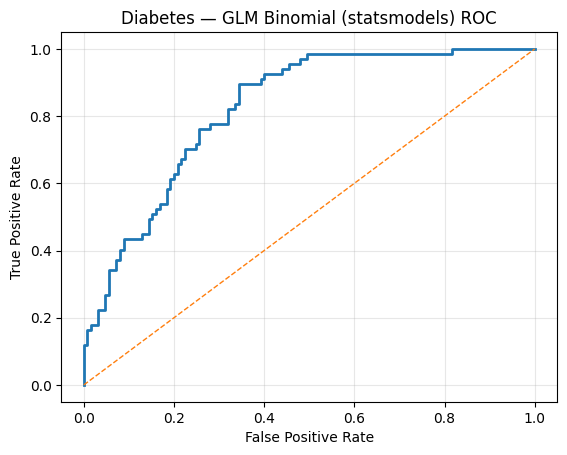

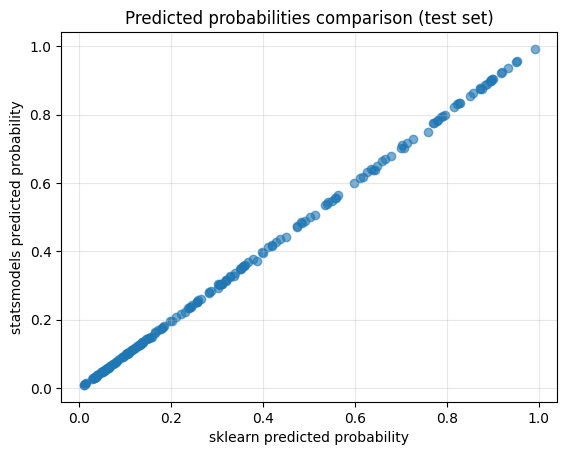

In [12]:
plot_roc(y_test, proba_test_sm, title="Diabetes — GLM Binomial (statsmodels) ROC")

# Compare predicted probabilities (scatter)
plt.figure()
plt.scatter(proba_test, proba_test_sm, alpha=0.6)
plt.xlabel("sklearn predicted probability")
plt.ylabel("statsmodels predicted probability")
plt.title("Predicted probabilities comparison (test set)")
plt.grid(True, alpha=0.3)
plt.show()


# بخش B — GLM پواسون (شمارش) با افست روی `NYC_Collisions.csv`

حالا از خروجی‌های دودویی به **شمارش‌ها** می‌رویم. GLM کلاسیک برای شمارش، رگرسیون پواسون است.

## B.1 پواسون چه چیزی را مدل می‌کند؟

فرض کنید $y_i$ یک شمارش نامنفی است و:

$$
y_i \sim \mathrm{Poisson}(\mu_i),\qquad \log(\mu_i)=x_i^\top\beta.
$$

پس $\mu_i=\exp(x_i^\top\beta)$ همیشه مثبت است.

## B.2 نرخ‌ها و افست (مواجهه)

اگر شمارش‌ها با مواجهه $E_i$ (مثلاً تعداد برخوردها، جمعیت، زمان در معرض) مقیاس شوند، یک **نرخ** مدل می‌کنیم:

$$
\log(\mu_i) = x_i^\top\beta + \log(E_i).
$$

معادل:

$$
\log\left(\frac{\mu_i}{E_i}\right) = x_i^\top\beta.
$$

در کد، افست را با `offset=np.log(E)` وارد می‌کنیم.

## B.3 چگونه اینجا از دیتاست استفاده می‌کنیم؟

`NYC_Collisions.csv` داده‌ی سطح برخورد دارد و شامل:

- زمان (`ACCIDENT_DATE`, `ACCIDENT_TIME`)
- مکان (`BOROUGH`)
- پیامدهایی مانند `PERSONS_INJURED`

است.

ما:

۱) ردیف‌های معتبر از نظر borough و زمان را نگه می‌داریم.  
۲) ویژگی می‌سازیم:
   - `hour` از زمان
   - `weekday` از تاریخ  
۳) برای ساخت هدف شمارشی تجمیع می‌کنیم:
   - مجموع مجروح‌ها در هر (borough, hour, weekday)  
۴) تعداد برخوردها در همان سبد را به‌عنوان مواجهه (افست) استفاده می‌کنیم.

این یک مدل **نرخ** ساده و تفسیرپذیر است:
- مجروح‌های مورد انتظار به ازای هر برخورد، با تغییر در borough و زمان.

## B.4 تشخیص: بیش‌پراکندگی

پواسون می‌گوید $\mathrm{Var}(y\mid x)=\mu$. وقتی داده واریانس بالاتری داشته باشد:

- خطاهای استاندارد می‌تواند خیلی کوچک شوند (معناداری کاذب)
- ساختار باقی‌مانده در باقیمانده‌ها نشان‌دهنده بدبرازش است

یک آماره ساده بیش‌پراکندگی را محاسبه می‌کنیم و یک جایگزین نگاتیو بینوم را (مفهومی) نشان می‌دهیم.

## B.5 تمرین‌ها (پواسون)

۱) افست را حذف کنید و دوباره برازش کنید. ضرایب و تفسیر چگونه تغییر می‌کند؟  
۲) یک برهم‌کنش `C(BOROUGH):hour` اضافه کنید (اثر ساعت مخصوص هر borough). آیا AIC بهتر می‌شود؟  
۳) بیش‌پراکندگی را بررسی کنید. اگر بزرگ بود، یک GLM نگاتیو بینوم بسازید و مقایسه کنید.  
۴) تقسیم آموزش/آزمون را بر اساس تاریخ انجام دهید (تقسیم زمانی). لگ‌درست‌نمایی پیش‌بینی روی دوره آزمون را ارزیابی کنید.

---


In [13]:
# Load NYC collisions dataset (count modeling)
collisions_path = "../../../Datasets/Regression/NYC_Collisions.csv"
df_col = safe_read_csv(collisions_path)

# Quick sanity check: show columns and first rows
df_col.columns, df_col.head()


(Index(['COLLISION_ID', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'BOROUGH', 'ZIP CODE',
        'LATITUDE', 'LONGITUDE', 'STREET NAME', 'CROSS STREET NAME',
        'FULL ADDRESS', 'VEHICLE TYPE', 'CONTRIBUTING FACTOR',
        'PERSONS INJURED', 'PERSONS KILLED', 'PEDESTRIANS INJURED',
        'PEDESTRIANS KILLED', 'CYCLIST INJURED', 'CYCLIST KILLED',
        'MOTORIST INJURED', 'MOTORIST KILLED'],
       dtype='object'),
    COLLISION_ID ACCIDENT_DATE ACCIDENT_TIME   BOROUGH  ZIP CODE   LATITUDE  \
 0       4380785    2021-01-01      00:00:00    QUEENS   11434.0  40.664536   
 1       4380974    2021-01-01      00:00:00    QUEENS   11355.0  40.754375   
 2       4381080    2021-01-01      00:00:00  BROOKLYN   11203.0  40.658295   
 3       4381095    2021-01-01      00:00:00  BROOKLYN   11212.0  40.661873   
 4       4381962    2021-01-01      00:00:00       NaN       NaN  40.834198   
 
    LONGITUDE         STREET NAME  CROSS STREET NAME              FULL ADDRESS  \
 0  -73.77314         

In [14]:
import re

df_col = df_col.copy()

# Normalize column names (strip whitespace and remove BOM if present)
df_col.columns = (
    df_col.columns
    .astype(str)
    .str.replace("\ufeff", "", regex=False)
    .str.strip()
)

def _resolve_column(df, candidates):
    """Return the first matching column name from candidates using robust matching."""
    cols = list(df.columns)

    # Exact match
    for c in candidates:
        if c in cols:
            return c

    # Case-insensitive exact match
    lower_map = {c.lower(): c for c in cols}
    for c in candidates:
        key = c.lower()
        if key in lower_map:
            return lower_map[key]

    # Flexible match: ignore underscores/spaces and case
    def norm(s: str) -> str:
        return re.sub(r"[\s_]+", "", s.strip().lower())

    norm_map = {norm(c): c for c in cols}
    for c in candidates:
        key = norm(c)
        if key in norm_map:
            return norm_map[key]

    return None

# Resolve required columns (handle naming variations across dataset versions)
col_borough = _resolve_column(df_col, ["BOROUGH", "Borough"])
col_date = _resolve_column(df_col, ["ACCIDENT_DATE", "ACCIDENT DATE", "DATE", "Accident Date"])
col_time = _resolve_column(df_col, ["ACCIDENT_TIME", "ACCIDENT TIME", "TIME", "Accident Time"])
col_inj = _resolve_column(df_col, ["PERSONS_INJURED", "PERSONS INJURED", "NUMBER_OF_PERSONS_INJURED", "NUMBER OF PERSONS INJURED"])
col_id = _resolve_column(df_col, ["COLLISION_ID", "COLLISION ID", "Collision_ID", "collision_id", "CRASH_ID", "CRASH ID"])

missing = [name for name, col in {
    "BOROUGH": col_borough,
    "ACCIDENT_DATE": col_date,
    "ACCIDENT_TIME": col_time,
    "PERSONS_INJURED": col_inj,
}.items() if col is None]

if missing:
    raise KeyError(
        "Required column(s) not found in NYC_Collisions dataset: "
        + ", ".join(missing)
        + "\nAvailable columns are:\n"
        + ", ".join(df_col.columns.astype(str).tolist())
    )

# Rename to canonical names
rename_map = {
    col_borough: "BOROUGH",
    col_date: "ACCIDENT_DATE",
    col_time: "ACCIDENT_TIME",
    col_inj: "PERSONS_INJURED",
}
if col_id is not None:
    rename_map[col_id] = "COLLISION_ID"

df_col = df_col.rename(columns=rename_map)

# Basic cleaning
df_col["BOROUGH"] = df_col["BOROUGH"].replace("", pd.NA)
df_col = df_col.dropna(subset=["BOROUGH", "ACCIDENT_DATE", "ACCIDENT_TIME"])

# Parse date/time robustly
df_col["ACCIDENT_DATE"] = pd.to_datetime(df_col["ACCIDENT_DATE"], errors="coerce")

# ACCIDENT_TIME may be 'HH:MM:SS' strings. Keep only time-of-day.
df_col["ACCIDENT_TIME"] = pd.to_datetime(df_col["ACCIDENT_TIME"].astype(str), errors="coerce").dt.time

df_col = df_col.dropna(subset=["ACCIDENT_DATE", "ACCIDENT_TIME"])

df_col["hour"] = df_col["ACCIDENT_TIME"].apply(lambda t: int(t.hour))
df_col["weekday"] = df_col["ACCIDENT_DATE"].dt.day_name()

# Target: persons injured per collision (non-negative integer-like)
df_col["PERSONS_INJURED"] = pd.to_numeric(df_col["PERSONS_INJURED"], errors="coerce").fillna(0).astype(int)

# If COLLISION_ID does not exist in this dataset version, fall back to row index count
if "COLLISION_ID" not in df_col.columns:
    df_col["COLLISION_ID"] = np.arange(len(df_col))

# Aggregate into buckets (borough, hour, weekday)
agg = (
    df_col.groupby(["BOROUGH", "hour", "weekday"], as_index=False)
    .agg(
        injuries_sum=("PERSONS_INJURED", "sum"),
        n_collisions=("COLLISION_ID", "count"),
    )
)

# Exposure is number of collisions in the bucket (must be > 0)
agg = agg[agg["n_collisions"] > 0].copy()
agg["offset_log_exposure"] = np.log(agg["n_collisions"])

agg.head()


C:\Users\LENOVO.PIESC\AppData\Local\Temp\ipykernel_16492\3354104553.py:83: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_col["ACCIDENT_TIME"] = pd.to_datetime(df_col["ACCIDENT_TIME"].astype(str), errors="coerce").dt.time


,BOROUGH,hour,weekday,injuries_sum,n_collisions,offset_log_exposure
0,BRONX,0,Friday,41,95,4.553877
1,BRONX,0,Monday,47,106,4.663439
2,BRONX,0,Saturday,30,118,4.770685
3,BRONX,0,Sunday,67,130,4.867534
4,BRONX,0,Thursday,28,78,4.356709


In [15]:
# Poisson GLM with offset (injuries per collision)
poisson_model = smf.glm(
    formula="injuries_sum ~ C(BOROUGH) + hour + C(weekday)",
    data=agg,
    family=sm.families.Poisson(),
    offset=agg["offset_log_exposure"]
)

poisson_res = poisson_model.fit()
poisson_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           injuries_sum   No. Observations:                  838
Model:                            GLM   Df Residuals:                      826
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.0
Date:                Mon, 26 Jan 2026   Deviance:                       1421.0
Time:                        04:24:30   Pearson chi2:                 1.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4478
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.1008      0.021    -51.555      0.000      -1.143      -1.059
C(BOROUGH)[T.BROOKLYN]          0.0739      0.015      4.866      0.000       0.044       0.104
C(BOROUGH)[T.MANHATTAN]        -0.0621      0.019     -3.335      0.001      -0.099      -0.026
C(BOROUGH)[T.QUEENS]            0.0008      0.016      0.051      0.959      -0.031       0.032
C(BOROUGH)[T.STATEN ISLAND]    -0.0473      0.031     -1.532      0.126      -0.108       0.013
C(weekday)[T.Monday]           -0.0356      0.020     -1.800      0.072      -0.074       0.003
C(weekday)[T.Saturday]          0.0452      0.019      2.331      0.020       0.007       0.083
C(weekday)[T.Sunday]            0.0744      0.020      3.769      0.000       0.036       0.113
C(weekday)[T.Thursday]          0.0291      0.019      1.504      0.132      -0.009       0.067
C(weekday)[T.Tuesday]           0.0196      0.020      1.003      0.316      -0.019       0.058
C(weekday)[T.Wednesday]         0.0103      0.019      0.530      0.596      -0.028       0.049
hour                            0.0171      0.001     19.364      0.000       0.015       0.019
===============================================================================================
"""

In [16]:
# Simple overdispersion check using Pearson chi-square / df_resid
pearson_chi2 = poisson_res.pearson_chi2
df_resid = poisson_res.df_resid
dispersion_ratio = pearson_chi2 / df_resid

pearson_chi2, df_resid, dispersion_ratio


(np.float64(1437.2310062148003), np.int64(826), np.float64(1.7399891116401942))

In [17]:
# Negative Binomial GLM (NB2) as a robustness alternative for overdispersion
alphas = [0.2, 0.5, 1.0, 2.0]
nb_results = []

for a in alphas:
    nb_model = smf.glm(
        formula="injuries_sum ~ C(BOROUGH) + hour + C(weekday)",
        data=agg,
        family=sm.families.NegativeBinomial(alpha=a),
        offset=agg["offset_log_exposure"]
    )
    nb_res = nb_model.fit()
    nb_results.append({"alpha": a, "aic": nb_res.aic})

pd.DataFrame(nb_results).sort_values("aic")


,alpha,aic
0,0.2,6241.894953
1,0.5,6809.698994
2,1.0,7349.498373
3,2.0,7985.027783


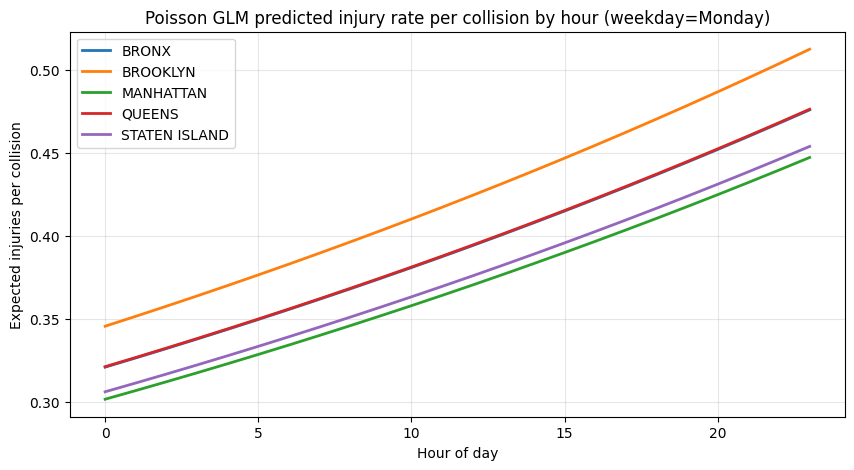

In [18]:
# Plot predicted injury rate per collision across hours for each borough (holding weekday fixed)
boroughs = sorted(agg["BOROUGH"].unique().tolist())
hours = np.arange(0, 24)
weekday_fixed = "Monday"

grid = pd.DataFrame([(b, h, weekday_fixed) for b in boroughs for h in hours], columns=["BOROUGH", "hour", "weekday"])
grid["offset_log_exposure"] = np.log(1.0)  # exposure = 1 collision

grid["pred_injuries_per_collision"] = poisson_res.predict(grid, offset=grid["offset_log_exposure"])

plt.figure(figsize=(10, 5))
for b in boroughs:
    s = grid[grid["BOROUGH"] == b]
    plt.plot(s["hour"], s["pred_injuries_per_collision"], label=b, linewidth=2)

plt.xlabel("Hour of day")
plt.ylabel("Expected injuries per collision")
plt.title("Poisson GLM predicted injury rate per collision by hour (weekday=Monday)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


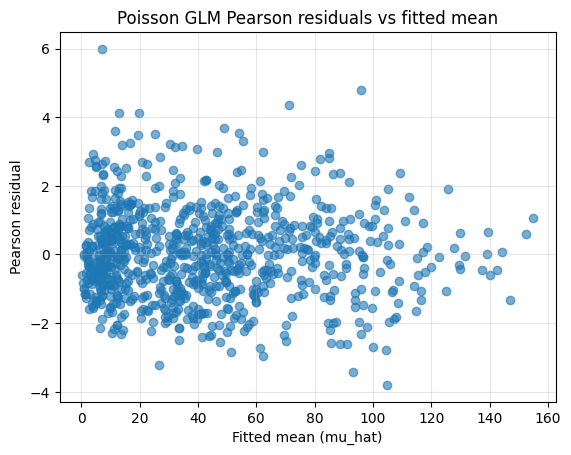

In [19]:
# Residual diagnostics for Poisson model
agg["mu_hat"] = poisson_res.predict(agg, offset=agg["offset_log_exposure"])
agg["pearson_resid"] = (agg["injuries_sum"] - agg["mu_hat"]) / np.sqrt(np.maximum(agg["mu_hat"], 1e-9))

plt.figure()
plt.scatter(agg["mu_hat"], agg["pearson_resid"], alpha=0.6)
plt.xlabel("Fitted mean (mu_hat)")
plt.ylabel("Pearson residual")
plt.title("Poisson GLM Pearson residuals vs fitted mean")
plt.grid(True, alpha=0.3)
plt.show()


In [20]:
# Compare with scikit-learn PoissonRegressor (also a GLM with log link)
X_po = agg[["BOROUGH", "hour", "weekday"]].copy()
y_po = agg["injuries_sum"].copy()
exposure = agg["n_collisions"].copy()

# One-hot encode categoricals, pass through numeric hour
cat_cols = ["BOROUGH", "weekday"]
num_cols = ["hour"]

preprocess_po = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

# PoissonRegressor supports sample_weight; here we use exposure as weights as a rough proxy.
# Note: This is not identical to a GLM offset, but often provides a useful comparison baseline.
po_reg = PoissonRegressor(alpha=0.0, max_iter=5000)

X_train_po, X_test_po, y_train_po, y_test_po, w_train_po, w_test_po = train_test_split(
    X_po, y_po, exposure, test_size=0.25, random_state=42
)

po_pipe = Pipeline(steps=[
    ("preprocess", preprocess_po),
    ("model", po_reg)
])

po_pipe.fit(X_train_po, y_train_po, model__sample_weight=w_train_po)

pred_test = po_pipe.predict(X_test_po)

{
    "MAE": mean_absolute_error(y_test_po, pred_test),
    "RMSE": float(np.sqrt(mean_squared_error(y_test_po, pred_test))),
}


{'MAE': np.float64(14.945130155494912), 'RMSE': 20.85850680185816}

# بخش C — GLM گاما (پیوسته مثبت) روی `European_Ski_Resorts.csv`

در نهایت یک هدف **پیوسته مثبت** را مدل می‌کنیم: `DayPassPriceAdult`.

قیمت‌ها معمولاً:
- قطعاً مثبت هستند،
- اغلب راست‌چوله‌اند،
- و واریانس آن‌ها با میانگین رشد می‌کند.

در چنین شرایطی، GLM گاما اغلب از گاوسی خطی مناسب‌تر است.

## C.1 مبانی GLM گاما

یک مشخص‌سازی رایج:

- توزیع: $y\sim \mathrm{Gamma}(\mu,\phi)$
- پیوند: لگاریتم

$$
\log(\mu_i)=x_i^\top\beta,\qquad \mu_i>0.
$$

تفسیر زیر پیوند لگاریتم:

- $\exp(\beta_j)$ تغییر ضربی در قیمت مورد انتظار به ازای افزایش یک واحدی $x_j$ است (با ثابت نگه‌داشتن سایر متغیرها).
- برای ویژگی‌هایی که واحد بزرگ دارند، تغییرات را در مقیاس معنادار (مثلاً +۱۰ یا +۱۰۰) تفسیر کنید.

## C.2 نکات عملی

- GLM گاما به هدف‌های کاملاً مثبت نیاز دارد. مقادیر نامعتبر را حذف می‌کنیم.
- پیش‌بین‌های کیفی مانند `Country` را می‌توان با `C(Country)` وارد کرد.

## C.3 تمرین‌ها (گاما)

۱) Gamma(log) را با Gaussian(identity) برای پیش‌بینی `DayPassPriceAdult` مقایسه کنید. AIC و الگوی باقیمانده‌ها را بررسی کنید.  
۲) GLM گاما را بدون `Country` برازش کنید. ضرایب چقدر تغییر می‌کنند؟  
۳) پیش‌بین‌های پیوسته را استاندارد کنید و دوباره برازش کنید. آیا برازش تغییر می‌کند؟ (پیش‌بینی‌ها معمولاً خیلی تغییر نمی‌کنند، اما ممکن است به بهینه‌سازی کمک کند.)  
۴) MAPE را روی آزمون محاسبه کنید و با یک خط پایه ساده (میانگین آموزش) مقایسه کنید.

---


In [21]:
# Load European ski resorts dataset (positive continuous outcome)
ski_path = "../../../Datasets/Regression/European_Ski_Resorts.csv"
df_ski = safe_read_csv(ski_path)

df_ski.head()


,Unnamed: 0,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
0,1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
1,2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
2,3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
3,4,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
4,5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450


In [22]:
df_ski = df_ski.copy()

# Drop an unnamed index-like column if present
unnamed_cols = [c for c in df_ski.columns if c.startswith("Unnamed")]
if unnamed_cols:
    df_ski = df_ski.drop(columns=unnamed_cols)

# Coerce key numeric columns
numeric_candidates = [
    "HighestPoint", "LowestPoint", "DayPassPriceAdult",
    "BeginnerSlope", "IntermediateSlope", "DifficultSlope", "TotalSlope",
    "SurfaceLifts", "ChairLifts", "GondolaLifts", "TotalLifts",
    "LiftCapacity", "SnowCannons"
]

for col in numeric_candidates:
    if col in df_ski.columns:
        df_ski[col] = pd.to_numeric(df_ski[col], errors="coerce")

# Target
target = "DayPassPriceAdult"
df_ski = df_ski.dropna(subset=[target, "Country", "TotalSlope", "LiftCapacity"]).copy()
df_ski = df_ski[df_ski[target] > 0].copy()

# Reduce the number of country categories to keep the example lightweight
top_countries = df_ski["Country"].value_counts().head(10).index
df_ski["Country_reduced"] = np.where(df_ski["Country"].isin(top_countries), df_ski["Country"], "Other")

# Feature set (feel free to expand)
feature_cols = ["TotalSlope", "LiftCapacity", "SnowCannons", "TotalLifts", "Country_reduced"]
for col in ["SnowCannons", "TotalLifts"]:
    if col not in df_ski.columns:
        df_ski[col] = np.nan

df_ski[feature_cols + [target]].head()


,TotalSlope,LiftCapacity,SnowCannons,TotalLifts,Country_reduced,DayPassPriceAdult
0,115,75398,600,49,Austria,52
1,210,99017,1032,72,Andorra,47
2,2,1932,0,2,Austria,30
3,51,32938,163,36,Austria,42
4,77,49228,450,27,Other,22


In [23]:
train_ski, test_ski = train_test_split(df_ski, test_size=0.25, random_state=42)

# Simple imputation for missing numeric predictors in this example
for col in ["SnowCannons", "TotalLifts"]:
    med = train_ski[col].median()
    train_ski[col] = train_ski[col].fillna(med)
    test_ski[col] = test_ski[col].fillna(med)

gamma_model = smf.glm(
    formula="DayPassPriceAdult ~ TotalSlope + LiftCapacity + SnowCannons + TotalLifts + C(Country_reduced)",
    data=train_ski,
    family=sm.families.Gamma(link=sm.families.links.log())
)

gamma_res = gamma_model.fit()
gamma_res.summary()


C:\Users\LENOVO.PIESC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      DayPassPriceAdult   No. Observations:                  276
Model:                            GLM   Df Residuals:                      261
Model Family:                   Gamma   Df Model:                           14
Link Function:                    log   Scale:                        0.034845
Method:                          IRLS   Log-Likelihood:                -943.15
Date:                Mon, 26 Jan 2026   Deviance:                       9.3212
Time:                        04:24:32   Pearson chi2:                     9.09
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7304
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             3.5912      0.099     36.384      0.000       3.398       3.785
C(Country_reduced)[T.Austria]         0.0997      0.098      1.017      0.309      -0.093       0.292
C(Country_reduced)[T.France]         -0.0865      0.099     -0.875      0.382      -0.280       0.107
C(Country_reduced)[T.Germany]        -0.2367      0.106     -2.234      0.025      -0.444      -0.029
C(Country_reduced)[T.Italy]           0.0641      0.102      0.626      0.531      -0.137       0.265
C(Country_reduced)[T.Norway]          0.1702      0.117      1.453      0.146      -0.059       0.400
C(Country_reduced)[T.Other]          -0.2420      0.104     -2.327      0.020      -0.446      -0.038
C(Country_reduced)[T.Slovakia]       -0.1095      0.144     -0.761      0.447      -0.391       0.172
C(Country_reduced)[T.Spain]           0.0702      0.120      0.586      0.558      -0.164       0.305
C(Country_reduced)[T.Sweden]          0.0799      0.136      0.587      0.557      -0.187       0.347
C(Country_reduced)[T.Switzerland]     0.3076      0.103      2.994      0.003       0.106       0.509
TotalSlope                            0.0005      0.000      1.507      0.132      -0.000       0.001
LiftCapacity                       3.861e-06   1.58e-06      2.447      0.014    7.69e-07    6.95e-06
SnowCannons                       -1.441e-05   5.49e-05     -0.263      0.793      -0.000    9.32e-05
TotalLifts                           -0.0033      0.002     -1.496      0.135      -0.008       0.001
=====================================================================================================
"""

In [24]:
pred_test_gamma = gamma_res.predict(test_ski)

mae = mean_absolute_error(test_ski[target], pred_test_gamma)
rmse = float(np.sqrt(mean_squared_error(test_ski[target], pred_test_gamma)))
mape = float(np.mean(np.abs((test_ski[target] - pred_test_gamma) / test_ski[target])))

{"MAE": mae, "RMSE": rmse, "MAPE": mape}


{'MAE': np.float64(5.02857614668503),
 'RMSE': 6.347979583451589,
 'MAPE': 0.13395702696559542}

In [25]:
# Baseline: Gaussian identity model (OLS-like) for comparison
gauss_model = smf.glm(
    formula="DayPassPriceAdult ~ TotalSlope + LiftCapacity + SnowCannons + TotalLifts + C(Country_reduced)",
    data=train_ski,
    family=sm.families.Gaussian(link=sm.families.links.identity())
)
gauss_res = gauss_model.fit()

pred_test_gauss = gauss_res.predict(test_ski)

mae_g = mean_absolute_error(test_ski[target], pred_test_gauss)
rmse_g = float(np.sqrt(mean_squared_error(test_ski[target], pred_test_gauss)))

{
    "Gamma_AIC": gamma_res.aic,
    "Gaussian_AIC": gauss_res.aic,
    "Gamma_MAE": mae,
    "Gaussian_MAE": mae_g,
    "Gamma_RMSE": rmse,
    "Gaussian_RMSE": rmse_g,
}


C:\Users\LENOVO.PIESC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(


{'Gamma_AIC': np.float64(1916.306847198394),
 'Gaussian_AIC': np.float64(1859.195690077699),
 'Gamma_MAE': np.float64(5.02857614668503),
 'Gaussian_MAE': np.float64(4.9415848130449564),
 'Gamma_RMSE': 6.347979583451589,
 'Gaussian_RMSE': 6.229702260629725}

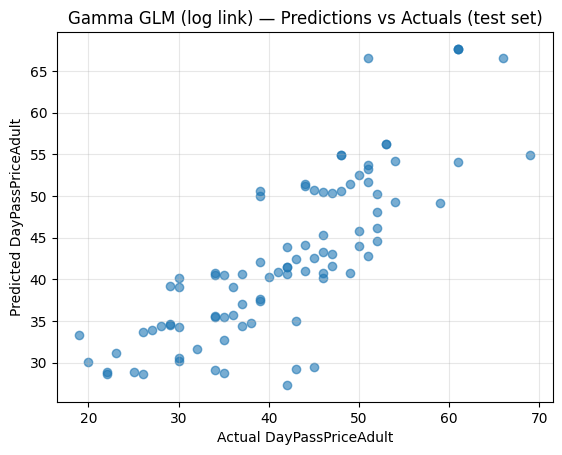

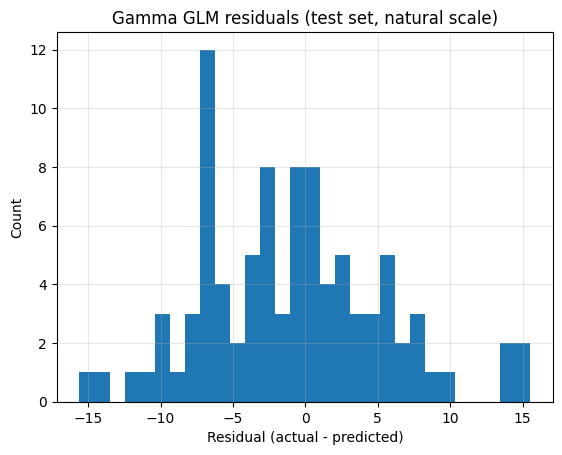

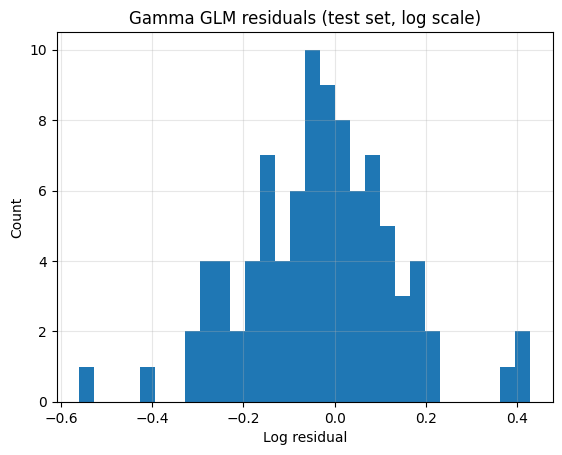

In [26]:
plt.figure()
plt.scatter(test_ski[target], pred_test_gamma, alpha=0.6)
plt.xlabel("Actual DayPassPriceAdult")
plt.ylabel("Predicted DayPassPriceAdult")
plt.title("Gamma GLM (log link) — Predictions vs Actuals (test set)")
plt.grid(True, alpha=0.3)
plt.show()

# Residuals on natural scale
resid = test_ski[target] - pred_test_gamma
plt.figure()
plt.hist(resid, bins=30)
plt.xlabel("Residual (actual - predicted)")
plt.ylabel("Count")
plt.title("Gamma GLM residuals (test set, natural scale)")
plt.grid(True, alpha=0.3)
plt.show()

# Residuals on log scale (often more symmetric for positive skew)
eps = 1e-9
log_resid = np.log(test_ski[target] + eps) - np.log(pred_test_gamma + eps)
plt.figure()
plt.hist(log_resid, bins=30)
plt.xlabel("Log residual")
plt.ylabel("Count")
plt.title("Gamma GLM residuals (test set, log scale)")
plt.grid(True, alpha=0.3)
plt.show()


## ۱۸) باقیمانده‌ها و تشخیص در GLM (مرور عملی)

تحلیل باقیمانده‌ها در GLM سخت‌تر از رگرسیون گاوسی است، چون واریانس ثابت نیست و میانگین با تابع پیوند تبدیل می‌شود. با این حال، تشخیص‌ها ضروری‌اند.

### ۱۸.۱ انواع باقیمانده

فرض کنید $\hat{\mu}_i$ میانگین برازش‌شده باشد.

- **باقیمانده پاسخ:** $r_i = y_i - \hat{\mu}_i$  
  تفسیرپذیر است اما پایدارسازی واریانس ندارد.

- **باقیمانده پیرسون:**
$$
r_i^{(P)} = \frac{y_i-\hat{\mu}_i}{\sqrt{\widehat{\mathrm{Var}}(y_i\mid x_i)}}.
$$

- **باقیمانده دیویانس:** از سهم هر مشاهده در دیویانس به‌دست می‌آید و اغلب متقارن‌تر است.

در بسیاری از جریان‌های کاری:
- از باقیمانده پیرسون برای بررسی بیش‌پراکندگی استفاده می‌شود،
- از باقیمانده دیویانس برای پیدا کردن بدبرازش‌های شدید استفاده می‌شود.

### ۱۸.۲ اهرم و نفوذ (سطح بالا)

مانند رگرسیون خطی، برخی نقاط می‌توانند اهرم بالایی در فضای ویژگی داشته باشند. در GLM نیز می‌بینید:
- نقاط نفوذگذار که $\hat{\beta}$ را شدیداً تغییر می‌دهند،
- نقاط دورافتاده روی مقیاس پاسخ.

الگوی عملی مفید:
۱) چند مورد باقیمانده بسیار بزرگ را پیدا کنید،  
۲) اهرم/نفوذ آن‌ها را بررسی کنید،  
۳) تشخیص دهید مسئله کیفیت داده است یا یک حالت نادر واقعی.

### ۱۸.۳ کالیبراسیون (طبقه‌بندی)

برای مدل‌های دوجمله‌ای، صرفاً ROC AUC بالا کافی نیست؛ معمولاً به کالیبراسیون احتمال هم نیاز دارید.

بررسی‌های رایج:
- نمودار کالیبراسیون،
- Brier score.

GLM لجستیکِ درست‌تخصیص‌یافته اغلب کالیبراسیون مناسبی دارد، اما عدم‌توازن کلاس، نشت داده، یا تغییر توزیع می‌تواند کالیبراسیون را خراب کند.

### ۱۸.۴ تشخیص برای مدل‌های شمارش

در مدل‌های پواسون:
- باقیمانده‌ها را در برابر مقدار برازش‌شده رسم کنید،
- الگوهای زمانی باقی‌مانده را بررسی کنید،
- بیش‌پراکندگی را بسنجید (Pearson chi-square / df)،
- اگر صفرها بیش از حد هستند، صفر-تورمی (zero inflation) را در نظر بگیرید.

### ۱۸.۵ تشخیص برای مثبت پیوسته (گاما/لگ)

برای گاما با پیوند لگاریتم:
- باقیمانده‌ها را روی مقیاس طبیعی و لگاریتمی بررسی کنید،
- ببینید آیا واریانس تقریباً با مربع میانگین رشد می‌کند،
- قیمت‌های بسیار بزرگ و نفوذگذار را شناسایی کنید.

---

## ۱۹) تمرین‌ها (تشخیص)

۱) در مدل لجستیک دیابت، احتمال‌های پیش‌بینی‌شده را برای مثبت‌ها و منفی‌ها رسم کنید. همپوشانی را می‌بینید؟ چه ارتباطی با ROC AUC دارد؟  
۲) در مدل پواسون، باقیمانده‌های پیرسون را در برابر میانگین برازش‌شده رسم کنید. آیا واریانس با میانگین رشد می‌کند؟  
۳) در مدل گاما، توزیع باقیمانده‌ها را روی مقیاس طبیعی و لگاریتمی مقایسه کنید.  
۴) ۵ مشاهده نفوذگذارتر در یک مدل را پیدا کنید (در صورت امکان از ابزارهای influence در statsmodels استفاده کنید) و توضیح دهید چرا نفوذگذارند.

---


# ۱۴) جمع‌بندی: یک چک‌لیست GLM قابل استفاده مجدد

وقتی با یک مسئله جدید نظارت‌شده روبه‌رو می‌شوید، می‌توانید تصمیم‌گیری GLM را این‌گونه ساختار دهید:

۱) **پشتیبان (support) متغیر هدف را مشخص کنید:**
   - دودویی $\rightarrow$ دوجمله‌ای
   - شمارش $\rightarrow$ پواسون / نگاتیو بینوم
   - پیوسته مثبت $\rightarrow$ گاما / یا رویکردهای شبیه لاگ-نرمال
   - پیوسته تقریباً متقارن $\rightarrow$ گاوسی

۲) **یک پیوند انتخاب کنید که قیود را رعایت کند و تفسیرپذیر باشد:**
   - لوجیت برای احتمال،
   - لگاریتم برای میانگین‌های مثبت و اثرهای ضربی،
   - همانی برای میانگین‌های بدون قید.

۳) **تصمیم بگیرید سطح را مدل می‌کنید یا نرخ را**
   - اگر مواجهه متفاوت است، از افست استفاده کنید.

۴) **برازش با بیشینه‌سازی درست‌نمایی**
   - هشدارهای همگرایی را بررسی کنید،
   - اگر ویژگی‌ها زیادند یا جداسازی رخ می‌دهد، منظم‌سازی را در نظر بگیرید.

۵) **ارزیابی مناسب**
   - طبقه‌بندی: ROC AUC، PR AUC، کالیبراسیون، آستانه تصمیم
   - شمارش: لگ‌درست‌نمایی پیش‌بینی، دیویانس، تشخیص باقیمانده، بیش‌پراکندگی
   - پیوسته مثبت: MAE/MAPE روی آزمون، باقیمانده‌ها روی مقیاس طبیعی و لگاریتمی

۶) **تفسیر ضرایب روی مقیاس درست**
   - نسبت شانس، نسبت نرخ، اثرهای ضربی

۷) **تنش‌زایی روی فرض‌ها**
   - جداسازی (لجستیک)
   - بیش‌پراکندگی / صفر-تورمی (پواسون)
   - دورافتاده‌ها و اهرم بالا
   - سوگیری حذف متغیر (دانش دامنه)

---

## ۱۵) تمرین نهایی (مینی پروژه)

یکی از گزینه‌های زیر را انتخاب کنید و در همین نوت‌بوک (یا یک نوت‌بوک جدید) پیاده‌سازی کنید:

### گزینه ۱ — جریان انتخاب مدل GLM (طبقه‌بندی)

- دیتاست: `diabetes.csv`
- ۳ مدل کاندید بسازید:
  ۱) مجموعه ویژگی کوچک،
  ۲) مجموعه کامل،
  ۳) کامل + برهم‌کنش‌ها
- مقایسه کنید:
  - AIC (statsmodels)
  - ROC AUC (آزمون)
  - نمودار کالیبراسیون
- یک یادداشت تصمیم کوتاه بنویسید: کدام مدل را برای انتشار انتخاب می‌کنید و چرا؟

### گزینه ۲ — مدل‌کردن نرخ با افست (شمارش)

- دیتاست: `NYC_Collisions.csv`
- مواجهه را تعداد برخوردها در هر سبد تعریف کنید (سبد را خودتان انتخاب کنید).
- برازش:
  - پواسون با افست،
  - نگاتیو بینوم به‌عنوان جایگزین
- مقایسه کنید:
  - AIC،
  - بیش‌پراکندگی،
  - پایداری زمانی (آموزش روی دوره قدیمی‌تر، آزمون روی دوره جدیدتر)

### گزینه ۳ — مدل قیمت‌گذاری (پیوسته مثبت)

- دیتاست: `European_Ski_Resorts.csv`
- مقایسه کنید:
  - گاوسی همانی،
  - گاما با پیوند لگاریتم
- ارزیابی:
  - MAE و MAPE روی آزمون
- تفسیر:
  - اثر `TotalSlope` و `LiftCapacity` را به‌صورت ضربی بیان کنید.

---

### گسترش اختیاری (پیشرفته)

برای یک ضریب در یک مدل، **بازه اطمینان بوت‌استرپ** بسازید:
۱) روی داده آموزش با جایگذاری مجدد نمونه‌برداری کنید.  
۲) هر بار مدل را برازش کنید.  
۳) توزیع بوت‌استرپ را رسم کنید و با بازه والد مقایسه کنید.

---
